In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

%matplotlib inline
from FITCvsVFE import *

In [3]:
#setup stuff including getting the training data.

tol=1e-11
nRepeats = 50

predict_limits = [-4., 4.]
inducing_points_limits = [-1., 9]
hold_out_limits = [0.20, 0.60]
optimization_limits = [18., 25.]

xtrain, ytrain, xtest, ytest = getTrainingTestData()

In [4]:
#run exact inference on training data.
exact_model = getRegressionModel(xtrain, ytrain)
opt = gpflow.train.ScipyOptimizer(tol=tol)
opt.minimize(exact_model, maxiter=2000000)

print("Exact model parameters.")
printModelParameters(exact_model)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 23.966658
  Number of iterations: 13
  Number of functions evaluations: 18
Exact model parameters.
Likelihood variance  

TypeError: __str__ returned non-string (type DataFrame)

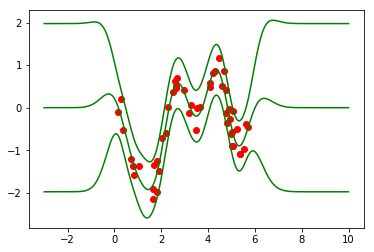

In [4]:
#plot the exact solution and the training data.
figA, axes = plt.subplots(1,1)
axes.plot(xtrain, ytrain, 'ro')
plotPredictions(axes, exact_model, 'g', None)

In [5]:
#Train VFE model initialized from the perfect solution
VFEmodel, VFEcb = trainSparseModel(xtrain, ytrain, exact_model, False, xtest, ytest)
print("Sparse model parameters for VFE optimization \n")
printModelParameters(VFEmodel)

repeatIndex  0


AttributeError: 'SGPR' object has no attribute 'optimize'

In [ ]:
#Train FITC model initialized from the perfect solution.
FITCmodel, FITCcb = trainSparseModel(xtrain,ytrain,exact_model,True,xtest,ytest)
print("Sparse model parameters for FITC optimization \n")
printModelParameters(FITCmodel)


In [ ]:
#Plot a comparison of the two algorithms. 
figB, axes = plt.subplots(3,2,figsize=(20, 16))
   
VFEiters = FITCcb.n_iters
VFElog_likelihoods = stretch(len(VFEiters), VFEcb.log_likelihoods)
VFEhold_out_likelihood = stretch( len(VFEiters), VFEcb.hold_out_likelihood)

plotComparisonFigure(xtrain, VFEmodel, exact_model, axes[0,0], axes[1,0], axes[2,0], VFEiters, VFElog_likelihoods.tolist(), VFEhold_out_likelihood.tolist(), "VFE")
plotComparisonFigure(xtrain, FITCmodel, exact_model, axes[0,1], axes[1,1], axes[2,1],FITCcb.n_iters, FITCcb.log_likelihoods, FITCcb.hold_out_likelihood , "FITC")

axes[0,0].set_title('VFE', loc='center', fontdict = {'fontsize': 22})
axes[0,1].set_title('FITC', loc='center', fontdict = {'fontsize': 22})  